# Actividad 1: Deep Vision

En esta actividad, el alumno debe evaluar y comparar dos estrategias para la clasificación de imágenes en el dataset Caltech 101. El dataset ha sido preprocesado y guardado utilizando pickle (más información sobre el preprocesado se puede obtener en el notebook "preprocesado_caltech101.ipynb").

Las instrucciones de cómo obtener el dataset aparecen al inicio de este notebook.

### Estrategia 1: Red pre-entrenada

La primera estrategia a comparar debe incluir la utilización de una red preentrenada con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de Caltech 101. Deben compararse al menos dos tipos de arquitecturas (VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/)

### Estrategia 2: Entrenar desde cero o *from scratch*

La segunda estrategia a comparar será una red neuronal profunda que el alumno debe diseñar, entrenar y optimizar. Se debe justificar empíricamente las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el alumno utilice todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (regularización, dropout, batch normalization, data augmentation, etc.).

## Normas a seguir

- Se debe entregar un ÚNICO notebook que incluya las instrucciones presentes. Debe aparecer todo el proceso seguido (i.e. carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- El notebook, junto a cualquier archivo necesario, __deberá entregarse como un link compartido__ en una carpeta gdrive.
- Tanto __la carga de archivos como guardar datos a archivos__ deberán siempre __contener referencias parciales__ con respecto a un directorio base (__BASE_FOLDER__).  En este notebook se incluye un ejemplo de cómo cargar datos utilizando un directorio base.
- Aunque los alumnos pueden trabajar en sus propios ordenadores, __la entrega deberá hacerse como un notebook en google colaboratory__, de forma que el profesor pueda abrir y ejecutar el código desde Google Colab sin necesitar alteraciones (salvo el cambio de BASE_FOLDER).
- Las __redes utilizadas deben estar entrenadas y ser cargadas__ desde un archivo. La entrega de una red sin entrenar supondrá perdida de puntos.
- Si se desea __evidenciar alguna métrica__ del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas y guardadas, y __mostradas en el notebook final solo como imagen__.
- Todos los archivos que deban adjuntarse a la actividad __deberán incluirse en la carpeta gdrive compartida__, y el notebook debe hacer referencias parciales a los mismos.
- Es recomendable crear una última sección de texto en el Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.




## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- Se deberá incluir mediante un link de acceso público, tanto el notebook como cualquier archivo que se utilice en el mismo. En el notebook se deberán cargar los modelos a través de estos archivos.
- El código debe poder ejecutarse sin modificación alguna (salvo el cambio de BASE_FOLDER) en Google Colaboratory.

### Obtención del dataset preprocesado Caltech 101

A partir de Caltech 101 dataset 
- Original en http://www.vision.caltech.edu/Image_Datasets/Caltech101/#Download
- Preprocesado subido al gdrive https://drive.google.com/open?id=1ziDd-Au-Fn8XneBeDQya9MjPBoTpDqqK

In [3]:
###################################################################################################
# La utilizacion de un directorio base es obligatoria
# Todas las referencias al disco duro (guardar o cargar) deberan tener esta variable como base
###################################################################################################
BASE_FOLDER = '/content/drive/My Drive/Master IA/Autores/07MAIR/Intro Deep learning/Recursos del profesor 2019/Actividad/'
###################################################################################################

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
%matplotlib inline

In [0]:
###################################################################################################
# Ejemplo de como cargar de archivos con referencia al directorio base
###################################################################################################

# DESCARGAR Y DESCOMPRIMIR EL DATASET CALTECH_PREPROCESADO DEL GDRIVE
# Cargar las ndarrays
with open(BASE_FOLDER+"pickle_all_images_df.pickle", "rb") as input_file:
    x_train = pickle.load(input_file)
with open(BASE_FOLDER+"pickle_all_classes.pickle", "rb") as input_file:
    y_train = pickle.load(input_file)


In [0]:
print(x_train.shape)
print(len(y_train))

(9145, 128, 128, 3)
9145


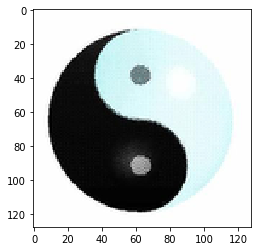

In [0]:
# show image
imgplot = plt.imshow(x_train[9144])
plt.show()

In [0]:
print(y_train[129])

airplanes


In [0]:
# Transformando las labels de texto a valores numéricos
y = np.unique(y_train)
mapping = { key : value for key,value in zip(y,range(len(y)))}
processed_y = np.array([mapping[i] for i in y_train])

In [0]:
print(processed_y[129])

6
